# Billboard Top 200 (Albums) Updated Dataframe Cleaning and Wrangling
## Based on newly released data (December 30th, 2023)

## Contents
## 01. Import libraries and datasets
## 02. Cleaning and wrangling
## 03. EDA to prepare for time series and visualization
## 04. Data export

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [2]:
# Create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [3]:
# Import billboard dataframe with updates

df = pd.read_csv(os.path.join(path,'01 Sourced Data', 'Main Dataframes', 'billboard-200-current (3).csv'), index_col = False)

In [4]:
# Import final album aggs dataframe for later merge

alb_aggs = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'final_alb_aggs.csv'), index_col = 0)

# 02. Cleaning

In [5]:
# Check import and head

df.head(50)

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2021-01-02,1,Evermore,Taylor Swift,1,1,2
1,2021-01-02,2,McCartney III,Paul McCartney,0,2,1
2,2021-01-02,3,Music To Be Murdered By,Eminem,199,1,48
3,2021-01-02,4,Christmas,Michael Buble,4,1,90
4,2021-01-02,5,Merry Christmas,Mariah Carey,10,3,99
5,2021-01-02,6,The Christmas Song,Nat King Cole,8,6,56
6,2021-01-02,7,My Gift,Carrie Underwood,6,5,13
7,2021-01-02,8,Folklore,Taylor Swift,3,1,22
8,2021-01-02,9,The Best Of Pentatonix Christmas,Pentatonix,13,7,18
9,2021-01-02,10,A Charlie Brown Christmas (Soundtrack),Vince Guaraldi Trio,12,10,88


In [6]:
df.tail(50)

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
592041,2020-01-04,151,Experiment,Kane Brown,132,1,59
592042,2020-01-04,152,Evolve,Imagine Dragons,147,2,131
592043,2020-01-04,153,K-12 (Soundtrack),Melanie Martinez,0,3,14
592044,2020-01-04,154,X 100PRE,Bad Bunny,124,11,53
592045,2020-01-04,155,MTV Unplugged In New York,Nirvana,182,1,97
592046,2020-01-04,156,The Kacey Musgraves Christmas Show (Soundtrack),Kacey Musgraves,0,120,2
592047,2020-01-04,157,Appetite For Destruction,Guns N' Roses,168,1,215
592048,2020-01-04,158,40 Christmas Classics,Andy Williams,0,158,2
592049,2020-01-04,159,Die A Legend,Polo G,127,6,29
592050,2020-01-04,160,Pure Southern Soul: Otis Redding,Otis Redding,0,160,2


In [7]:
df.shape

(592091, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592091 entries, 0 to 592090
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   chart_week    592091 non-null  object
 1   current_week  592091 non-null  int64 
 2   title         592034 non-null  object
 3   performer     592091 non-null  object
 4   last_week     592091 non-null  int64 
 5   peak_pos      592091 non-null  int64 
 6   wks_on_chart  592091 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 31.6+ MB


In [9]:
df.describe()

,current_week,last_week,peak_pos,wks_on_chart
count,592091.000000,592091.000000,592091.000000,592091.000000
mean,100.471889,85.406316,41.502837,37.881359
std,57.720210,59.169661,50.280954,70.736399
min,1.000000,0.000000,1.000000,1.000000
25%,50.000000,33.000000,4.000000,6.000000
50%,100.000000,83.000000,19.000000,16.000000
75%,150.000000,135.000000,63.000000,38.000000
max,200.000000,200.000000,200.000000,987.000000


### Column renames

In [10]:
df.columns

Index(['chart_week', 'current_week', 'title', 'performer', 'last_week',
       'peak_pos', 'wks_on_chart'],
      dtype='object')

In [11]:
df.rename(columns = {'current_week': 'chart_position', 'title': 'album_title', 'performer': 'artist', 'last_week': 'prior_wk_position'}, inplace=True)

In [12]:
df.columns

Index(['chart_week', 'chart_position', 'album_title', 'artist',
       'prior_wk_position', 'peak_pos', 'wks_on_chart'],
      dtype='object')

### Check for missing values

In [13]:
df.isnull().sum()

chart_week            0
chart_position        0
album_title          57
artist                0
prior_wk_position     0
peak_pos              0
wks_on_chart          0
dtype: int64

This is a bit bizarre, will check what these null values could be

In [14]:
df_null = df[df['album_title'].isnull() == True]

In [15]:
df_null

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart
247499,1988-12-31,9,NaN,Silhouette,9,8,11
247699,1988-12-24,9,NaN,Silhouette,9,8,10
247899,1988-12-17,9,NaN,Silhouette,9,8,9
248099,1988-12-10,9,NaN,Silhouette,8,8,8
248298,1988-12-03,8,NaN,Silhouette,9,8,7
248499,1988-11-26,9,NaN,Silhouette,10,9,6
248700,1988-11-19,10,NaN,Silhouette,16,10,5
248906,1988-11-12,16,NaN,Silhouette,18,16,4
249108,1988-11-05,18,NaN,Silhouette,25,18,3
249315,1988-10-29,25,NaN,Silhouette,63,25,2


Decision to remove- one artist outside of time range

In [16]:
df.shape

(592091, 7)

In [17]:
df.dropna(inplace = True)

In [18]:
df.shape

(592034, 7)

### Check for duplicates

In [19]:
df_dupes = df[df.duplicated()]

In [20]:
df_dupes

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart
200148,1983-07-16,57,Jane Fonda's Workout Record,Jane Fonda,52,15,67
200343,1983-07-09,52,Jane Fonda's Workout Record,Jane Fonda,46,15,66
200345,1983-07-09,52,Jane Fonda's Workout Record,Jane Fonda,181,15,66
200537,1983-07-02,46,Jane Fonda's Workout Record,Jane Fonda,33,15,65
200539,1983-07-02,46,Jane Fonda's Workout Record,Jane Fonda,167,15,65
200675,1983-07-02,181,Jane Fonda's Workout Record,Jane Fonda,33,15,65
200677,1983-07-02,181,Jane Fonda's Workout Record,Jane Fonda,167,15,65
200724,1983-06-25,33,Jane Fonda's Workout Record,Jane Fonda,34,15,63
200726,1983-06-25,33,Jane Fonda's Workout Record,Jane Fonda,117,15,63
200861,1983-06-25,167,Jane Fonda's Workout Record,Jane Fonda,34,15,63


Choosing to ignore because plan to subset data frame to only relevant time periods

### Data types

In [21]:
# Check for mixed data types

for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)                                                                             
    if len (df[weird]) > 0:
        print (col)

C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\862644976.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\862644976.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\862644976.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\862644976.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) !=df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\862644976.py:4: FutureWarn

In [22]:
df.dtypes

chart_week           object
chart_position        int64
album_title          object
artist               object
prior_wk_position     int64
peak_pos              int64
wks_on_chart          int64
dtype: object

In [23]:
# Convert the chart_week column to datetime

df['chart_week'] = pd.to_datetime(df['chart_week'])

In [24]:
df['chart_week'].dtype

dtype('<M8[ns]')

In [25]:
df.shape

(592034, 7)

In [26]:
# Get all the unique values in the chart week columns

unique_weeks_sub = df['chart_week'].unique()

In [27]:
unique_weeks_sub.shape

(2961,)

In [28]:
# Create dataframe with values 10/24/2008 onward

df_sub = df.loc[(df['chart_week'] > '10/24/2006')]

In [29]:
df_sub.head(10)

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart
0,2021-01-02,1,Evermore,Taylor Swift,1,1,2
1,2021-01-02,2,McCartney III,Paul McCartney,0,2,1
2,2021-01-02,3,Music To Be Murdered By,Eminem,199,1,48
3,2021-01-02,4,Christmas,Michael Buble,4,1,90
4,2021-01-02,5,Merry Christmas,Mariah Carey,10,3,99
5,2021-01-02,6,The Christmas Song,Nat King Cole,8,6,56
6,2021-01-02,7,My Gift,Carrie Underwood,6,5,13
7,2021-01-02,8,Folklore,Taylor Swift,3,1,22
8,2021-01-02,9,The Best Of Pentatonix Christmas,Pentatonix,13,7,18
9,2021-01-02,10,A Charlie Brown Christmas (Soundtrack),Vince Guaraldi Trio,12,10,88


In [30]:
df_sorted = df_sub.sort_values(by='chart_week', ascending=False)

In [31]:
df_sorted.head(20)

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart
31252,2023-12-30,53,Greatest Hits,Queen,61,8,574
31262,2023-12-30,63,Heroes & Villains,Metro Boomin,56,1,55
31272,2023-12-30,73,Religiously. The Album.,Bailey Zimmerman,69,7,32
31271,2023-12-30,72,Gettin' Old,Luke Combs,73,4,39
31270,2023-12-30,71,Chronicle: The 20 Greatest Hits,Creedence Clearwater Revival,81,18,673
31269,2023-12-30,70,DAMN.,Kendrick Lamar,72,1,349
31268,2023-12-30,69,Merry Christmas,Bing Crosby,77,69,28
31267,2023-12-30,68,When Christmas Comes Around...,Kelly Clarkson,78,22,18
31266,2023-12-30,67,My Turn,Lil Baby,60,1,199
31265,2023-12-30,66,Take Care,Drake,68,1,564


## Wrangling

In [32]:
df_sorted['album_title'].value_counts(dropna=False)

album_title
Greatest Hits                         3884
Legend: The Best Of...                 699
Journey's Greatest Hits                694
Doo-Wops & Hooligans                   655
Chronicle The 20 Greatest Hits         633
                                      ... 
It's Album Time                          1
Tremors                                  1
Homemade Tamales: Live At Floore's       1
Eternal Enemies                          1
Young Machetes                           1
Name: count, Length: 14501, dtype: int64

In [33]:
unique_artists = df['artist'].nunique()

In [34]:
unique_artists

9986

In [35]:
artist_counts = df_sorted['artist'].value_counts(dropna=False)

In [36]:
artist_counts.head(20)

artist
Soundtrack         6265
Various Artists    4863
Drake              2727
Taylor Swift       2638
Eminem             1940
Michael Jackson    1351
The Weeknd         1197
Kendrick Lamar     1166
The Beatles        1153
Ed Sheeran         1110
Adele              1107
Zac Brown Band     1085
Bruno Mars         1075
Blake Shelton      1040
Kanye West         1001
Imagine Dragons     995
Post Malone         955
J. Cole             892
Luke Bryan          838
Jason Aldean        806
Name: count, dtype: int64

In [37]:
df_top_artists = df_sorted[df_sorted['artist'].isin(artist_counts[artist_counts > 1000].index)]

In [38]:
df_top_artists.head(10)

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart
31269,2023-12-30,70,DAMN.,Kendrick Lamar,72,1,349
31265,2023-12-30,66,Take Care,Drake,68,1,564
31264,2023-12-30,65,Starboy,The Weeknd,64,1,320
31260,2023-12-30,61,"good kid, m.A.A.d city",Kendrick Lamar,66,2,582
31257,2023-12-30,58,Curtain Call: The Hits,Eminem,51,1,663
31276,2023-12-30,77,Certified Lover Boy,Drake,71,1,120
31291,2023-12-30,92,The Highlights,The Weeknd,37,2,146
31287,2023-12-30,88,Thriller,Michael Jackson,100,1,605
31286,2023-12-30,87,Graduation,Kanye West,79,1,307
31285,2023-12-30,86,Trolls: Band Together,Soundtrack,88,86,5


In [39]:
df_top_artists.shape

(29718, 7)

In [40]:
# Find the min (best) position for each of the top 13 artists

peak_posit = df_top_artists.groupby('artist').agg({
    'peak_pos': ['min'], 'wks_on_chart': ['max']
    }).reset_index()

In [41]:
peak_posit.columns

MultiIndex([(      'artist',    ''),
            (    'peak_pos', 'min'),
            ('wks_on_chart', 'max')],
           )

In [42]:
peak_posit = peak_posit.sort_values(by=('wks_on_chart', 'max'), ascending=False)

In [43]:
peak_posit

,artist,peak_pos,wks_on_chart
,,min,max
5,Eminem,1,663
2,Bruno Mars,1,655
8,Michael Jackson,1,605
0,Adele,1,591
7,Kendrick Lamar,1,582
3,Drake,1,564
11,The Beatles,1,540
10,Taylor Swift,1,471
14,Zac Brown Band,1,385


In [44]:
df_top_artists.columns

Index(['chart_week', 'chart_position', 'album_title', 'artist',
       'prior_wk_position', 'peak_pos', 'wks_on_chart'],
      dtype='object')

In [45]:
# Breakdown artists and their albums

alb_stats = df_top_artists.groupby(['artist', 'album_title']).agg({
    'peak_pos': ['min'], 'wks_on_chart': ['max']
}).reset_index()

In [46]:
alb_stats

,artist,album_title,peak_pos,wks_on_chart
,,,min,max
0,Adele,19,4,222
1,Adele,21,1,591
2,Adele,25,1,222
3,Adele,30,1,69
4,Adele,iTunes Festival: London 2011 (EP),50,2
...,...,...,...,...
1370,Zac Brown Band,The Grohl Sessions: Vol. I (EP),25,4
1371,Zac Brown Band,The Owl,2,4
1372,Zac Brown Band,Uncaged,1,102


In [47]:
unique_artist_album_count = alb_stats.groupby('artist')['album_title'].nunique().reset_index()

In [48]:
unique_artist_album_count

,artist,album_title
0,Adele,6
1,Blake Shelton,15
2,Bruno Mars,4
3,Drake,14
4,Ed Sheeran,9
5,Eminem,12
6,Kanye West,10
7,Kendrick Lamar,6
8,Michael Jackson,18
9,Soundtrack,526


# Create a subset of Billboard albums with only Taylor Swift

In [49]:
# Create billboard album df with ONLY Taylor Swift

bill_taylor_albs = df_top_artists.loc[df_top_artists['artist'] == 'Taylor Swift']

In [50]:
bill_taylor_albs.shape

(2638, 7)

In [51]:
bill_taylor_albs.head()

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart
31284,2023-12-30,85,1989,Taylor Swift,82,1,471
31214,2023-12-30,15,Speak Now (Taylor's Version),Taylor Swift,19,1,24
31211,2023-12-30,12,Folklore,Taylor Swift,10,1,178
31206,2023-12-30,7,Lover,Taylor Swift,9,1,226
31202,2023-12-30,3,Midnights,Taylor Swift,7,1,61


In [52]:
bill_taylor_albs.describe()

,chart_week,chart_position,prior_wk_position,peak_pos,wks_on_chart
count,2638,2638.000000,2638.000000,2638.000000,2638.000000
mean,2018-02-01 19:47:48.536770304,72.686126,65.681577,2.160728,125.623199
min,2006-11-11 00:00:00,1.000000,0.000000,1.000000,1.000000
25%,2012-12-29 00:00:00,23.000000,19.000000,1.000000,46.000000
50%,2020-03-17 12:00:00,56.000000,49.000000,1.000000,105.000000
75%,2022-08-06 00:00:00,121.000000,110.000000,1.000000,177.000000
max,2023-12-30 00:00:00,200.000000,200.000000,88.000000,471.000000
std,NaN,58.158017,55.824426,4.207270,100.718273


# EDA

In [53]:
bill_taylor_albs['album_title'].value_counts(dropna=False)

album_title
1989                                                    471
Taylor Swift                                            284
reputation                                              274
Fearless                                                261
Lover                                                   226
Speak Now                                               193
Red                                                     185
Folklore                                                178
Evermore                                                158
Fearless (Taylor's Version)                             128
Red (Taylor's Version)                                  110
Midnights                                                61
The Taylor Swift Holiday Collection (EP)                 43
Speak Now (Taylor's Version)                             24
Beautiful Eyes (EP)                                      21
Speak Now: World Tour Live CD + DVD                      11
1989 (Taylor's Version)     

In [54]:
# Isolate to be only studio albums

bill_ts_studio_albs = bill_taylor_albs.loc[bill_taylor_albs['album_title'].isin(['1989', 'reputation', 'Fearless', 'Lover', 'Speak Now', 'Red', 'Taylor Swift', 'Folklore', 'Evermore', "Fearless ('Taylor's Version)", "Red (Taylor's Version)", 'Midnights', "Speak Now (Taylor's Version)", "1989 (Taylor's Version)"])]

In [55]:
bill_ts_studio_albs.head()

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart
31284,2023-12-30,85,1989,Taylor Swift,82,1,471
31214,2023-12-30,15,Speak Now (Taylor's Version),Taylor Swift,19,1,24
31211,2023-12-30,12,Folklore,Taylor Swift,10,1,178
31206,2023-12-30,7,Lover,Taylor Swift,9,1,226
31202,2023-12-30,3,Midnights,Taylor Swift,7,1,61


In [56]:
bill_ts_studio_albs['album_title'].value_counts(dropna=False)

album_title
1989                            471
Taylor Swift                    284
reputation                      274
Fearless                        261
Lover                           226
Speak Now                       193
Red                             185
Folklore                        178
Evermore                        158
Red (Taylor's Version)          110
Midnights                        61
Speak Now (Taylor's Version)     24
1989 (Taylor's Version)           8
Name: count, dtype: int64

# Consistency checks for other df merges

In [57]:
bill_ts_studio_albs.columns

Index(['chart_week', 'chart_position', 'album_title', 'artist',
       'prior_wk_position', 'peak_pos', 'wks_on_chart'],
      dtype='object')

In [58]:
bill_ts_studio_albs.shape

(2433, 7)

In [59]:
# Update album titles

title_update = []

for value in bill_ts_studio_albs['album_title']:
    if value == "1989":
        title_update.append("1989")
    elif value == "Taylor Swift":
        title_update.append("Debut")
    elif value == "reputation":
        title_update.append("reputation")
    elif value == "Fearless":
        title_update.append("Fearless")
    elif value == "Lover":
        title_update.append("Lover")
    elif value == "Speak Now":
        title_update.append("Speak Now")
    elif value == "Red":
        title_update.append("Red")
    elif value == "Folklore":
        title_update.append("folklore")
    elif value == "Evermore":
        title_update.append("evermore")
    elif value == "Red (Taylor's Version)":
        title_update.append("Red (Taylor's Version)")
    elif value == "Midnights":
        title_update.append("Midnights")
    elif value == "Speak Now (Taylor's Version)":
        title_update.append("Speak Now (Taylor's Version)")
    elif value == "1989 (Taylor's Version)":
        title_update.append("1989 (Taylor's Version)")
    else:
        title_update.append("unknown")

In [60]:
bill_ts_studio_albs['alb_title'] = title_update

C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\2078206197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_ts_studio_albs['alb_title'] = title_update


In [61]:
bill_ts_studio_albs['alb_title'].value_counts(dropna=False)

alb_title
1989                            471
Debut                           284
reputation                      274
Fearless                        261
Lover                           226
Speak Now                       193
Red                             185
folklore                        178
evermore                        158
Red (Taylor's Version)          110
Midnights                        61
Speak Now (Taylor's Version)     24
1989 (Taylor's Version)           8
Name: count, dtype: int64

In [62]:
bill_ts_studio_albs.shape

(2433, 8)

In [63]:
# Add album_id column

# Will assign album_ids to each album in order to be able to merge, using for loop

bill_alb_id = []

for value in bill_ts_studio_albs['alb_title']:
    if value == "1989":
        bill_alb_id.append("1989")
    elif value == "Debut":
        bill_alb_id.append("DEBUT")
    elif value == "reputation":
        bill_alb_id.append("REP")
    elif value == "Fearless":
        bill_alb_id.append("FEAR")
    elif value == "Lover":
        bill_alb_id.append("LOVE")
    elif value == "Speak Now":
        bill_alb_id.append("SPEAK")
    elif value == "Red":
        bill_alb_id.append("RED")
    elif value == "folklore":
        bill_alb_id.append("FOLK")
    elif value == "evermore":
        bill_alb_id.append("EVER")
    elif value == "Red (Taylor's Version)":
        bill_alb_id.append("REDTV")
    elif value == "Midnights":
        bill_alb_id.append("MIDN")
    elif value == "Speak Now (Taylor's Version)":
        bill_alb_id.append("SPEAKTV")
    elif value == "1989 (Taylor's Version)":
        bill_alb_id.append("1989TV")
    else:
        bill_alb_id.append("unknown")

In [64]:
bill_ts_studio_albs['album_id'] = bill_alb_id

C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\2044358823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_ts_studio_albs['album_id'] = bill_alb_id


In [65]:
bill_ts_studio_albs['album_id'].value_counts(dropna=False)

album_id
1989       471
DEBUT      284
REP        274
FEAR       261
LOVE       226
SPEAK      193
RED        185
FOLK       178
EVER       158
REDTV      110
MIDN        61
SPEAKTV     24
1989TV       8
Name: count, dtype: int64

In [66]:
count_songs = bill_ts_studio_albs['chart_week'].value_counts().reset_index(name='count')
count_songs = count_songs.rename(columns={'index':'date'})

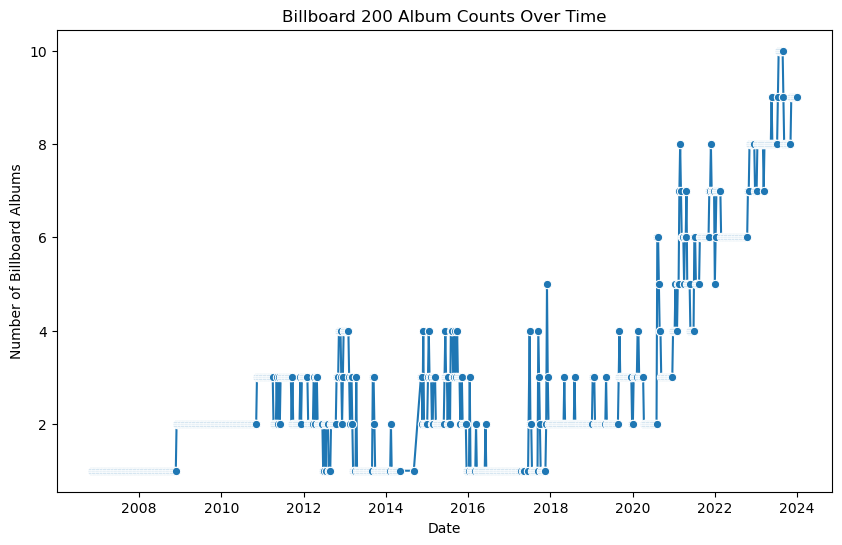

In [67]:
# Creating a line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='chart_week', y='count', data=count_songs, marker='o')

# Setting plot labels and title
plt.xlabel('Date')
plt.ylabel('Number of Billboard Albums')
plt.title('Billboard 200 Album Counts Over Time')

# Displaying the plot
plt.show()

## Subset with only certain time range: 
### August 23rd, 2019 onward 
### Dec 13th 2022- Dec 13th 2023

In [68]:
count_songs

,chart_week,count
0,2023-08-26,10
1,2023-07-22,10
2,2023-07-29,10
3,2023-08-05,10
4,2023-08-12,10
...,...,...
859,2014-02-22,1
860,2014-03-01,1
861,2014-03-08,1
862,2014-03-15,1


In [69]:
# Create dataframe with values for 2023

df_2023 = count_songs.loc[(count_songs['chart_week'] > '12/31/2022')]

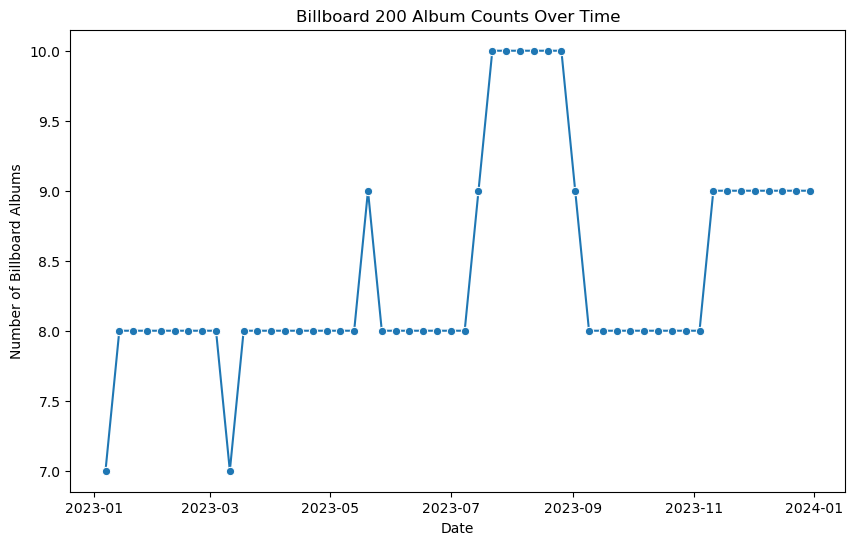

In [70]:
# Creating a line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='chart_week', y='count', data=df_2023, marker='o')

# Setting plot labels and title
plt.xlabel('Date')
plt.ylabel('Number of Billboard Albums')
plt.title('Billboard 200 Album Counts Over Time')

# Displaying the plot
plt.show()

In [71]:
# Create dataframe with values for all albums owned by Taylor

df_ts_owned = count_songs.loc[(count_songs['chart_week'] > '08/23/2019')]

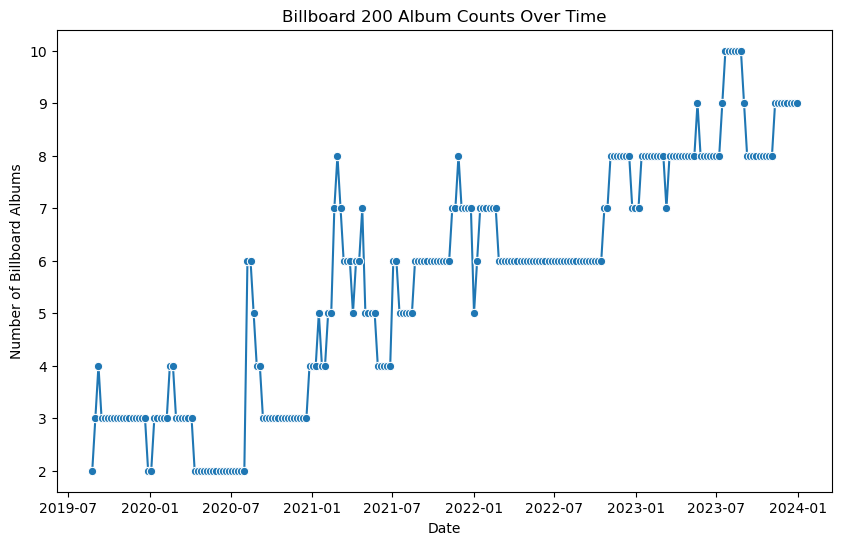

In [72]:
# Creating a line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='chart_week', y='count', data=df_ts_owned, marker='o')

# Setting plot labels and title
plt.xlabel('Date')
plt.ylabel('Number of Billboard Albums')
plt.title('Billboard 200 Album Counts Over Time')

# Displaying the plot
plt.show()

# Examine Top 10 album figures

In [73]:
top_10_position = bill_ts_studio_albs[bill_ts_studio_albs['chart_position'] < 11]

In [74]:
top_10_position.shape

(350, 9)

In [75]:
top_10_position.head()

,chart_week,chart_position,album_title,artist,prior_wk_position,peak_pos,wks_on_chart,alb_title,album_id
31206,2023-12-30,7,Lover,Taylor Swift,9,1,226,Lover,LOVE
31202,2023-12-30,3,Midnights,Taylor Swift,7,1,61,Midnights,MIDN
31200,2023-12-30,1,1989 (Taylor's Version),Taylor Swift,2,1,8,1989 (Taylor's Version),1989TV
31009,2023-12-23,10,Folklore,Taylor Swift,9,1,177,folklore,FOLK
31008,2023-12-23,9,Lover,Taylor Swift,11,1,225,Lover,LOVE


In [76]:
top_10_position['album_id'].value_counts(dropna=False)

album_id
MIDN       61
1989       60
FEAR       58
LOVE       46
FOLK       27
RED        17
DEBUT      17
SPEAK      15
REP        12
EVER       11
SPEAKTV     9
REDTV       9
1989TV      8
Name: count, dtype: int64

In [77]:
top_20_position = bill_ts_studio_albs[bill_ts_studio_albs['chart_position'] < 21]

In [78]:
top_20_position.shape

(578, 9)

In [79]:
top_20_position['album_id'].value_counts(dropna=False)

album_id
1989       95
FOLK       76
FEAR       73
LOVE       66
MIDN       61
DEBUT      58
REP        35
SPEAKTV    23
REDTV      22
RED        22
SPEAK      22
EVER       17
1989TV      8
Name: count, dtype: int64

# Create a merged dataframe with billboard and album info

## 13 albums (all but Fearless TV)
## bill_ts_studio_albs and final_alb_aggs dataframes

In [80]:
bill_ts_studio_albs.columns

Index(['chart_week', 'chart_position', 'album_title', 'artist',
       'prior_wk_position', 'peak_pos', 'wks_on_chart', 'alb_title',
       'album_id'],
      dtype='object')

In [81]:
alb_aggs.head(10)

,album_id,album_title,tv,alb_num,alb_track_cnt,wk1_sales,tot_alb_plays,alb_streams_norm,avg_song_pop,top_s_cnt,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,1989,1989 (Deluxe Edition),original,5.0,16,1297000.0,2.209340e+08,66949.0,67.157895,5.0,...,0.6200,0.7100,0.000000,0.1000,-5.9200,0.05000,120.9800,0.4900,230733.0,skyblue
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.0,22,1359000.0,1.462294e+09,112484136.0,79.818182,14.0,...,0.6100,0.6785,0.000010,0.1135,-6.4830,0.04420,118.0225,0.3740,224955.0,steelblue
2,DEBUT,Debut,original,1.0,15,39000.0,1.164904e+09,187127.0,63.133333,1.0,...,0.5760,0.6720,0.000000,0.1280,-4.9310,0.02930,115.0280,0.4280,213053.0,mediumseagreen
3,EVER,evermore (deluxe version),original,9.0,17,154500.0,3.801517e+09,3584268.0,72.764706,9.0,...,0.5460,0.5170,0.000066,0.1140,-10.3810,0.03770,122.0790,0.3540,245026.0,chocolate
4,FEAR,Fearless Platinum Edition,original,2.0,19,592300.0,2.590572e+09,473068.0,45.947368,2.0,...,0.5920,0.6360,0.000000,0.1130,-4.9930,0.03080,118.9820,0.3070,244240.0,goldenrod
5,FEARTV,Fearless (Taylor's Version),Taylor's Version,10.0,26,179000.0,3.776863e+09,4000902.0,71.615385,10.0,...,0.5660,0.6250,0.000000,0.1300,-6.0890,0.03435,129.0315,0.4225,241989.5,darkgoldenrod
6,FOLK,folklore (deluxe version),original,8.0,17,615000.0,6.156253e+09,5119556.0,73.058824,8.0,...,0.5930,0.3760,0.000015,0.1050,-10.0640,0.03630,119.5800,0.4040,234000.0,grey
7,LOVE,Lover,original,7.0,18,679000.0,8.029477e+09,5217324.0,82.611111,7.0,...,0.7035,0.5990,0.000018,0.1080,-7.8055,0.05700,107.0135,0.4700,199419.5,orchid
8,MIDN,Midnights (The Til Dawn Edition),original,12.0,23,1140000.0,7.116052e+09,19032283.0,69.608696,12.0,...,0.6530,0.4510,0.000031,0.1180,-10.3120,0.06510,109.8460,0.1980,204852.0,darkblue
9,RED,Red (Deluxe Edition),original,4.0,22,1208000.0,3.204012e+09,794044.0,47.863636,4.0,...,0.6250,0.5995,0.000034,0.1020,-6.7765,0.03200,109.9930,0.4775,238666.5,crimson


In [82]:
alb_aggs.shape

(14, 28)

In [83]:
# Rename album_title from billboards to be general title

bill_ts_studio_albs.rename(columns = {'album_title': 'bill_alb_title'}, inplace = True)

C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\2822062714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_ts_studio_albs.rename(columns = {'album_title': 'bill_alb_title'}, inplace = True)


In [84]:
bill_ts_studio_albs.columns

Index(['chart_week', 'chart_position', 'bill_alb_title', 'artist',
       'prior_wk_position', 'peak_pos', 'wks_on_chart', 'alb_title',
       'album_id'],
      dtype='object')

In [85]:
bill_ts_studio_albs['artist'].value_counts(dropna=False)

artist
Taylor Swift    2433
Name: count, dtype: int64

In [86]:
# Drop artist column

bill_ts_studio_albs.drop(columns = ['artist'], axis=1, inplace=True)

C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\741120182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_ts_studio_albs.drop(columns = ['artist'], axis=1, inplace=True)


In [87]:
bill_ts_studio_albs.columns

Index(['chart_week', 'chart_position', 'bill_alb_title', 'prior_wk_position',
       'peak_pos', 'wks_on_chart', 'alb_title', 'album_id'],
      dtype='object')

In [88]:
bill_ts_studio_albs.shape

(2433, 8)

In [89]:
# Create a normalized figure that accounts for days since release
# added on since the november 9th album streams amounts
# This was calculated by using the prior list of top 20 position appearances
# and dividing that by the days since release
# days since release was calculated by adding 49 to the current listed days
# since release, which was calculated on nov 9th
# Then dividing days since release by 7 since chart stats are in weeks 

top_20_dec_norm = []

for value in bill_ts_studio_albs['album_id']:
    if value == "1989":
        top_20_dec_norm.append(0.199)
    elif value == "REP":
        top_20_dec_norm.append(0.316)
    elif value == "FEAR":
        top_20_dec_norm.append(0.092)
    elif value == "LOVE":
        top_20_dec_norm.append(0.369)
    elif value == "SPEAK":
        top_20_dec_norm.append(0.069)
    elif value == "RED":
        top_20_dec_norm.append(0.37)
    elif value == "FOLK":
        top_20_dec_norm.append(0.536)
    elif value == "EVER":
        top_20_dec_norm.append(0.107)
    elif value == "REDTV":
        top_20_dec_norm.append(0.038)
    elif value == "MIDN":
        top_20_dec_norm.append(0.269)
    elif value == "SPEAKTV":
        top_20_dec_norm.append(0.034)
    elif value == "1989TV":
        top_20_dec_norm.append(0.903)
    elif value == "DEBUT":
        top_20_dec_norm.append(0.00)
    else:
        top_20_dec_norm.append("unknown")

In [90]:
bill_ts_studio_albs['top_20_norm'] = top_20_dec_norm

C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\3457961611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_ts_studio_albs['top_20_norm'] = top_20_dec_norm


In [91]:
bill_ts_studio_albs['top_20_norm'].value_counts(dropna=False)

top_20_norm
0.199    471
0.000    284
0.316    274
0.092    261
0.369    226
0.069    193
0.370    185
0.536    178
0.107    158
0.038    110
0.269     61
0.034     24
0.903      8
Name: count, dtype: int64

In [92]:
# Merge album aggregate df with billboard 200 dataframe, using billboard
# as the left df. 

bill_alb_aggs_merge = pd.merge(bill_ts_studio_albs, alb_aggs, how='left', on='album_id', indicator=True)

In [93]:
bill_alb_aggs_merge.shape

(2433, 37)

In [94]:
bill_alb_aggs_merge.columns

Index(['chart_week', 'chart_position', 'bill_alb_title', 'prior_wk_position',
       'peak_pos', 'wks_on_chart', 'alb_title', 'album_id', 'top_20_norm',
       'album_title', 'tv', 'alb_num', 'alb_track_cnt', 'wk1_sales',
       'tot_alb_plays', 'alb_streams_norm', 'avg_song_pop', 'top_s_cnt',
       'top_alb_count', 'top_alb_normal', 'days_sr', 'alb_ann_day',
       'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m', 'dance_m', 'ener_m',
       'instru_m', 'live_m', 'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m',
       'color', '_merge'],
      dtype='object')

In [95]:
bill_alb_aggs_merge['_merge'].value_counts(dropna=False)

_merge
both          2433
left_only        0
right_only       0
Name: count, dtype: int64

In [96]:
# Drop merge flag column

bill_alb_aggs_merge.drop(columns = ['_merge'], axis=1, inplace=True)

In [97]:
bill_alb_aggs_merge.head(20)

,chart_week,chart_position,bill_alb_title,prior_wk_position,peak_pos,wks_on_chart,alb_title,album_id,top_20_norm,album_title,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,2023-12-30,85,1989,82,1,471,1989,1989,0.199,1989 (Deluxe Edition),...,0.6200,0.7100,0.000000,0.1000,-5.9200,0.05000,120.9800,0.4900,230733.0,skyblue
1,2023-12-30,15,Speak Now (Taylor's Version),19,1,24,Speak Now (Taylor's Version),SPEAKTV,0.034,Speak Now (Taylor's Version),...,0.5340,0.6635,0.000000,0.1405,-4.3315,0.03265,131.5015,0.3670,274065.5,indigo
2,2023-12-30,12,Folklore,10,1,178,folklore,FOLK,0.536,folklore (deluxe version),...,0.5930,0.3760,0.000015,0.1050,-10.0640,0.03630,119.5800,0.4040,234000.0,grey
3,2023-12-30,7,Lover,9,1,226,Lover,LOVE,0.369,Lover,...,0.7035,0.5990,0.000018,0.1080,-7.8055,0.05700,107.0135,0.4700,199419.5,orchid
4,2023-12-30,3,Midnights,7,1,61,Midnights,MIDN,0.269,Midnights (The Til Dawn Edition),...,0.6530,0.4510,0.000031,0.1180,-10.3120,0.06510,109.8460,0.1980,204852.0,darkblue
5,2023-12-30,1,1989 (Taylor's Version),2,1,8,1989 (Taylor's Version),1989TV,0.903,1989 (Taylor's Version)[Deluxe],...,0.6100,0.6785,0.000010,0.1135,-6.4830,0.04420,118.0225,0.3740,224955.0,steelblue
6,2023-12-30,25,Red (Taylor's Version),25,1,110,Red (Taylor's Version),REDTV,0.038,Red (Taylor's Version),...,0.6035,0.5860,0.000000,0.1085,-6.4385,0.03135,123.0240,0.4265,241593.0,firebrick
7,2023-12-30,42,reputation,34,1,274,reputation,REP,0.316,reputation,...,0.6490,0.6020,0.000002,0.1300,-6.7190,0.07320,128.0700,0.3050,227906.0,k
8,2023-12-30,26,Evermore,32,1,158,evermore,EVER,0.107,evermore (deluxe version),...,0.5460,0.5170,0.000066,0.1140,-10.3810,0.03770,122.0790,0.3540,245026.0,chocolate
9,2023-12-23,82,1989,80,1,470,1989,1989,0.199,1989 (Deluxe Edition),...,0.6200,0.7100,0.000000,0.1000,-5.9200,0.05000,120.9800,0.4900,230733.0,skyblue


In [98]:
num_1 = bill_alb_aggs_merge.loc[bill_alb_aggs_merge['peak_pos'] == 1]

In [99]:
num_1['album_id'].value_counts(dropna=False)

album_id
1989       471
REP        274
FEAR       261
LOVE       226
SPEAK      193
RED        185
FOLK       178
EVER       158
REDTV      110
MIDN        61
SPEAKTV     24
1989TV       8
Name: count, dtype: int64

In [100]:
bill_alb_aggs_merge.columns

Index(['chart_week', 'chart_position', 'bill_alb_title', 'prior_wk_position',
       'peak_pos', 'wks_on_chart', 'alb_title', 'album_id', 'top_20_norm',
       'album_title', 'tv', 'alb_num', 'alb_track_cnt', 'wk1_sales',
       'tot_alb_plays', 'alb_streams_norm', 'avg_song_pop', 'top_s_cnt',
       'top_alb_count', 'top_alb_normal', 'days_sr', 'alb_ann_day',
       'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m', 'dance_m', 'ener_m',
       'instru_m', 'live_m', 'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m',
       'color'],
      dtype='object')

# Create distilled version with aggs of billboard charts

In [101]:
bill_ts_studio_albs.columns

Index(['chart_week', 'chart_position', 'bill_alb_title', 'prior_wk_position',
       'peak_pos', 'wks_on_chart', 'alb_title', 'album_id', 'top_20_norm'],
      dtype='object')

In [102]:
bill_ts_studio_albs.dtypes

chart_week           datetime64[ns]
chart_position                int64
bill_alb_title               object
prior_wk_position             int64
peak_pos                      int64
wks_on_chart                  int64
alb_title                    object
album_id                     object
top_20_norm                 float64
dtype: object

In [103]:
bill_ts_studio_albs['top_20_norm'].value_counts(dropna=True)

top_20_norm
0.199    471
0.000    284
0.316    274
0.092    261
0.369    226
0.069    193
0.370    185
0.536    178
0.107    158
0.038    110
0.269     61
0.034     24
0.903      8
Name: count, dtype: int64

In [104]:
# Convert top_20_norm to float

bill_ts_studio_albs['top_20_norm'] = bill_ts_studio_albs['top_20_norm'].astype(float)

C:\Users\leobs\AppData\Local\Temp\ipykernel_60116\792753538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_ts_studio_albs['top_20_norm'] = bill_ts_studio_albs['top_20_norm'].astype(float)


In [105]:
bill_ts_studio_albs['top_20_norm'].dtype

dtype('float64')

In [106]:
bill_ts_studio_albs['top_20_norm'].value_counts(dropna=True)

top_20_norm
0.199    471
0.000    284
0.316    274
0.092    261
0.369    226
0.069    193
0.370    185
0.536    178
0.107    158
0.038    110
0.269     61
0.034     24
0.903      8
Name: count, dtype: int64

In [107]:
bill_aggs = bill_ts_studio_albs.groupby(['album_id']).agg(
                peak_bill_pos=('peak_pos','min'),
                max_chart_wks=('wks_on_chart','max'),
                top_20_norm= ('top_20_norm', 'mean')
            ).reset_index()

In [108]:
bill_aggs

,album_id,peak_bill_pos,max_chart_wks,top_20_norm
0,1989,1,471,0.199
1,1989TV,1,8,0.903
2,DEBUT,5,284,0.000
3,EVER,1,158,0.107
4,FEAR,1,261,0.092
5,FOLK,1,178,0.536
6,LOVE,1,226,0.369
7,MIDN,1,61,0.269
8,RED,1,185,0.370
9,REDTV,1,110,0.038


In [109]:
bill_aggs.columns

Index(['album_id', 'peak_bill_pos', 'max_chart_wks', 'top_20_norm'], dtype='object')

## Merge bill_aggs with final_alb_aggs in a final version 2 album aggs

In [110]:
alb_aggs

,album_id,album_title,tv,alb_num,alb_track_cnt,wk1_sales,tot_alb_plays,alb_streams_norm,avg_song_pop,top_s_cnt,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,1989,1989 (Deluxe Edition),original,5.0,16,1297000.0,2.209340e+08,66949.0,67.157895,5.0,...,0.6200,0.7100,0.000000,0.1000,-5.9200,0.05000,120.9800,0.4900,230733.0,skyblue
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.0,22,1359000.0,1.462294e+09,112484136.0,79.818182,14.0,...,0.6100,0.6785,0.000010,0.1135,-6.4830,0.04420,118.0225,0.3740,224955.0,steelblue
2,DEBUT,Debut,original,1.0,15,39000.0,1.164904e+09,187127.0,63.133333,1.0,...,0.5760,0.6720,0.000000,0.1280,-4.9310,0.02930,115.0280,0.4280,213053.0,mediumseagreen
3,EVER,evermore (deluxe version),original,9.0,17,154500.0,3.801517e+09,3584268.0,72.764706,9.0,...,0.5460,0.5170,0.000066,0.1140,-10.3810,0.03770,122.0790,0.3540,245026.0,chocolate
4,FEAR,Fearless Platinum Edition,original,2.0,19,592300.0,2.590572e+09,473068.0,45.947368,2.0,...,0.5920,0.6360,0.000000,0.1130,-4.9930,0.03080,118.9820,0.3070,244240.0,goldenrod
5,FEARTV,Fearless (Taylor's Version),Taylor's Version,10.0,26,179000.0,3.776863e+09,4000902.0,71.615385,10.0,...,0.5660,0.6250,0.000000,0.1300,-6.0890,0.03435,129.0315,0.4225,241989.5,darkgoldenrod
6,FOLK,folklore (deluxe version),original,8.0,17,615000.0,6.156253e+09,5119556.0,73.058824,8.0,...,0.5930,0.3760,0.000015,0.1050,-10.0640,0.03630,119.5800,0.4040,234000.0,grey
7,LOVE,Lover,original,7.0,18,679000.0,8.029477e+09,5217324.0,82.611111,7.0,...,0.7035,0.5990,0.000018,0.1080,-7.8055,0.05700,107.0135,0.4700,199419.5,orchid
8,MIDN,Midnights (The Til Dawn Edition),original,12.0,23,1140000.0,7.116052e+09,19032283.0,69.608696,12.0,...,0.6530,0.4510,0.000031,0.1180,-10.3120,0.06510,109.8460,0.1980,204852.0,darkblue
9,RED,Red (Deluxe Edition),original,4.0,22,1208000.0,3.204012e+09,794044.0,47.863636,4.0,...,0.6250,0.5995,0.000034,0.1020,-6.7765,0.03200,109.9930,0.4775,238666.5,crimson


In [111]:
# Merge billboard album aggregates df with album aggregates (sales, plays, song characteristics, etc.)
# use alb aggs as the left df 

alb_aggs_merge_final = pd.merge(alb_aggs, bill_aggs, how='left', on='album_id', indicator=True)

In [112]:
alb_aggs_merge_final.shape

(14, 32)

In [113]:
alb_aggs_merge_final['_merge'].value_counts(dropna=True)

_merge
both          13
left_only      1
right_only     0
Name: count, dtype: int64

In [114]:
alb_aggs_merge_final.isnull().sum()

album_id            0
album_title         0
tv                  0
alb_num             0
alb_track_cnt       0
wk1_sales           0
tot_alb_plays       0
alb_streams_norm    0
avg_song_pop        0
top_s_cnt           0
top_alb_count       0
top_alb_normal      0
days_sr             0
alb_ann_day         0
alb_ann_yr          0
alb_r_day           0
alb_r_yr            0
acou_m              0
dance_m             0
ener_m              0
instru_m            0
live_m              0
loud_m              0
speech_m            0
temp_m              0
val_m               0
dur_m               0
color               0
peak_bill_pos       1
max_chart_wks       1
top_20_norm         1
_merge              0
dtype: int64

In [115]:
alb_aggs_merge_final.dtypes

album_id              object
album_title           object
tv                    object
alb_num              float64
alb_track_cnt          int64
wk1_sales            float64
tot_alb_plays        float64
alb_streams_norm     float64
avg_song_pop         float64
top_s_cnt            float64
top_alb_count        float64
top_alb_normal       float64
days_sr              float64
alb_ann_day          float64
alb_ann_yr           float64
alb_r_day            float64
alb_r_yr             float64
acou_m               float64
dance_m              float64
ener_m               float64
instru_m             float64
live_m               float64
loud_m               float64
speech_m             float64
temp_m               float64
val_m                float64
dur_m                float64
color                 object
peak_bill_pos        float64
max_chart_wks        float64
top_20_norm          float64
_merge              category
dtype: object

In [116]:
# Drop merge column

alb_aggs_merge_final.drop(columns='_merge', axis=1, inplace=True)

In [117]:
alb_aggs_merge_final.fillna(0, inplace=True)

In [118]:
alb_aggs_merge_final.isnull().sum()

album_id            0
album_title         0
tv                  0
alb_num             0
alb_track_cnt       0
wk1_sales           0
tot_alb_plays       0
alb_streams_norm    0
avg_song_pop        0
top_s_cnt           0
top_alb_count       0
top_alb_normal      0
days_sr             0
alb_ann_day         0
alb_ann_yr          0
alb_r_day           0
alb_r_yr            0
acou_m              0
dance_m             0
ener_m              0
instru_m            0
live_m              0
loud_m              0
speech_m            0
temp_m              0
val_m               0
dur_m               0
color               0
peak_bill_pos       0
max_chart_wks       0
top_20_norm         0
dtype: int64

In [119]:
alb_aggs_merge_final

,album_id,album_title,tv,alb_num,alb_track_cnt,wk1_sales,tot_alb_plays,alb_streams_norm,avg_song_pop,top_s_cnt,...,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color,peak_bill_pos,max_chart_wks,top_20_norm
0,1989,1989 (Deluxe Edition),original,5.0,16,1297000.0,2.209340e+08,66949.0,67.157895,5.0,...,0.1000,-5.9200,0.05000,120.9800,0.4900,230733.0,skyblue,1.0,471.0,0.199
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.0,22,1359000.0,1.462294e+09,112484136.0,79.818182,14.0,...,0.1135,-6.4830,0.04420,118.0225,0.3740,224955.0,steelblue,1.0,8.0,0.903
2,DEBUT,Debut,original,1.0,15,39000.0,1.164904e+09,187127.0,63.133333,1.0,...,0.1280,-4.9310,0.02930,115.0280,0.4280,213053.0,mediumseagreen,5.0,284.0,0.000
3,EVER,evermore (deluxe version),original,9.0,17,154500.0,3.801517e+09,3584268.0,72.764706,9.0,...,0.1140,-10.3810,0.03770,122.0790,0.3540,245026.0,chocolate,1.0,158.0,0.107
4,FEAR,Fearless Platinum Edition,original,2.0,19,592300.0,2.590572e+09,473068.0,45.947368,2.0,...,0.1130,-4.9930,0.03080,118.9820,0.3070,244240.0,goldenrod,1.0,261.0,0.092
5,FEARTV,Fearless (Taylor's Version),Taylor's Version,10.0,26,179000.0,3.776863e+09,4000902.0,71.615385,10.0,...,0.1300,-6.0890,0.03435,129.0315,0.4225,241989.5,darkgoldenrod,0.0,0.0,0.000
6,FOLK,folklore (deluxe version),original,8.0,17,615000.0,6.156253e+09,5119556.0,73.058824,8.0,...,0.1050,-10.0640,0.03630,119.5800,0.4040,234000.0,grey,1.0,178.0,0.536
7,LOVE,Lover,original,7.0,18,679000.0,8.029477e+09,5217324.0,82.611111,7.0,...,0.1080,-7.8055,0.05700,107.0135,0.4700,199419.5,orchid,1.0,226.0,0.369
8,MIDN,Midnights (The Til Dawn Edition),original,12.0,23,1140000.0,7.116052e+09,19032283.0,69.608696,12.0,...,0.1180,-10.3120,0.06510,109.8460,0.1980,204852.0,darkblue,1.0,61.0,0.269
9,RED,Red (Deluxe Edition),original,4.0,22,1208000.0,3.204012e+09,794044.0,47.863636,4.0,...,0.1020,-6.7765,0.03200,109.9930,0.4775,238666.5,crimson,1.0,185.0,0.370


# Dataframe export

In [120]:
# Export billboard 200 with top 13 artists

df_top_artists.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_top_13_artists_updated.csv'))


In [121]:
# Export billboard 200 dataframe with added album aggs
# Only Taylor Swift

bill_alb_aggs_merge.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_alb_aggs_merge.csv'))

In [122]:
# Export album aggs with added billboard info

alb_aggs_merge_final.to_csv(os.path.join(path, '02 Manipulated Data', 'final_2_alb_aggs.csv'))